<center> <img src = https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Booking.com_Logo.svg/220px-Booking.com_Logo.svg.png alt="drawing" style="width:400px;">

# <center> Проект: Обучение модели для сайта Booking

* Представьте, что вы работаете дата-сайентистом в компании Booking. 
* Одна из проблем компании — это нечестные отели, которые накручивают себе рейтинг. Одним из способов обнаружения таких отелей является построение модели, которая предсказывает рейтинг отеля. 
* Если предсказания модели сильно отличаются от фактического результата, то, возможно, отель ведёт себя нечестно, и его стоит проверить.
* Вам поставлена задача создать такую модель на основе датасета

Первоначальная версия датасета содержит 17 полей со следующей информацией:

* hotel_address — адрес отеля;
* review_date — дата, когда рецензент разместил соответствующий отзыв;
* average_score — средний балл отеля, рассчитанный на основе последнего комментария за последний год;
* hotel_name — название отеля;
* reviewer_nationality — страна рецензента;
* negative_review — отрицательный отзыв, который рецензент дал отелю;
* review_total_negative_word_counts — общее количество слов в отрицательном отзыв;
* positive_review — положительный отзыв, который рецензент дал отелю;
* review_total_positive_word_counts — общее количество слов в положительном отзыве.
* reviewer_score — оценка, которую рецензент поставил отелю на основе своего опыта;
* total_number_of_reviews_reviewer_has_given — количество отзывов, которые рецензенты дали в прошлом;
* total_number_of_reviews — общее количество действительных отзывов об отеле;
* tags — теги, которые рецензент дал отелю;
* days_since_review — количество дней между датой проверки и датой очистки;
* additional_number_of_scoring — есть также некоторые гости, которые просто поставили оценку сервису, но не оставили отзыв. Это число указывает, сколько там действительных оценок без проверки.
* lat — географическая широта отеля;
* lng — географическая долгота отеля.

In [1]:
import pandas as pd

In [2]:
hotels = pd.read_csv('data/hotels.zip')
hotels.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643


# Ответы на вопросы, связанные с первичными данными

In [4]:
#Отвечаем на некоторые вопросы, связанные с данными
hotels.info()

# пропущенные данные есть в столбцах lat и lng
# или можно через 
# cols_null_percent = hotels.isnull().mean() * 100
# cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
# display(cols_with_null)


# данные числового формата хранятся в столбцах: 
# additional_number_of_scoring
# average_score
# review_total_negative_word_counts
# total_number_of_reviews 
# review_total_positive_word_counts
# total_number_of_reviews_reviewer_has_given
# reviewer_score
# lat
# lng

# данные строкового формата хранятся в столбцах: 
# hotel_address
# hotel_name
# reviewer_nationality
# negative_review
# positive_review
# tags
# days_since_review 


# признак, представляющий собой дату - review_date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

# Создание признаков и ответы на вопросы по обработанным данным

In [5]:
#попробуем создать максимальное количество признаков, но для начала ответим на вопросы

#переведем столбец review date в тип даты
hotels_prepared = hotels.copy()
hotels_prepared['review_date'] = pd.to_datetime(hotels_prepared['review_date'])

#ответы на вопросы по данным

#даты самого первого и свежего отзыва
#hotels_prepared['review_date'].min()
#2017-08-03
#hotels_prepared['review_date'].max()
#2015-08-04

# количество уникальных названий отелей
# len(hotels_prepared['hotel_name'].unique())
# 1492


#переведём столбец days_since_review в числовой формат
hotels_prepared['days_since_review'] = hotels_prepared['days_since_review'].apply(lambda x: x.split(" ")[0]).astype('int')


In [6]:
# выведем признак количества тегов (отказался от этой идеи, т.к. важность признака низкая при расчёте результируюшего показателя)
#hotels_prepared['count_tags']=hotels_prepared['tags'].apply(lambda x: len(x.split(',')))

#определение количества уникальных тегов
list_of_tags=list()

#преобразуем строковые значения в список, убираем ненужные символы, добавляем уникальные значения в список
for i in range(0,hotels_prepared.shape[0]):
    unique_values = list(hotels_prepared['tags'][i].replace("[",'').replace(']','').split(', '))
    for j in unique_values:
        if j not in list_of_tags: list_of_tags.append(j)
        
display(len(list_of_tags))
# 2368

2368

In [7]:
# определим какой тег встречается чаще всего
# cделаем отдельную копию df c одним столбцоv tags
hotels_prepared_new = hotels_prepared.copy()
new_list = list(hotels_prepared_new.columns)
new_list.remove('tags')
hotels_prepared_new = hotels_prepared_new.drop(new_list, axis = 1)  

#разделим значения в столбце, уберем ненужные символы и переведём в вид списка
hotels_prepared_new['tags'] = hotels_prepared_new['tags'].apply(lambda x: list(x.replace("[",'').replace(']','').split(', ')))

#используем explode чтобы вывести значения списка с каждую отдельную строку
hotels_prepared_new = hotels_prepared_new.explode('tags')

#посчитаем значения встречающихся тегов, отсортируем по количеству и выведем первое
hotels_prepared_new['tags'].value_counts(ascending=False).head(1)
#' Leisure trip '  313593

' Leisure trip '    313593
Name: tags, dtype: int64

In [8]:
# сколько ночей останавливаются путешественники
# заметил, что теги с указанием количества ночей начинаются с слов Stayed
# соберем список таких тегов
list_of_tags_nights = []
for i in list_of_tags:
    if 'Stayed' in i and (i not in list_of_tags_nights):
        list_of_tags_nights.append(i)
        
# len(list_of_tags_nights)
# получилось около 30 вариантов

#display(hotels_prepared_new.value_counts(ascending=False).loc[list_of_tags_nights,].sort_values(ascending=False))
# самый популярный  - на 1 ночь

# Попробуем создать дополнительные признаки и преобразовать текущие
1. Мы уже создали признак по количеству тегов в отзыве (затем отказался от этой идеи), перевели в числовой формат признак days_since_review, перевели дату в формат даты
2. Предлагаю создать следующие признаки:
    *   Месяц из даты отзыва (будет категориальным)
    *   Год из даты отзыва (будет категориальным) (в последующем отказался, т.к. важность признака низкая)
    *   Признак reviewer_nationality преобразуем в категориальный
    *   Страна отеля (будет категориальным)
    *   Количество проведённых ночей по тегах
    *   Наличие соответствующего тега (выберем наиболее популярные, остальные - заменим значением) (в последующем отказался, т.к. важность признака низкая)

In [9]:
# выделяем признак месяца
hotels_prepared['month_of_review'] = hotels_prepared['review_date'].dt.month
#hotels_prepared['month_of_review'].head()

In [10]:
# выделяем признак года (отказался от признака)
#hotels_prepared['year_of_review'] = hotels_prepared['review_date'].dt.year
#hotels_prepared['year_of_review'].head()

In [11]:
#Признак reviewer_nationality преобразуем в категориальный
#всего 225 уникальных значений
len(hotels_prepared['reviewer_nationality'].unique())

#Посмотрим распределение значений
#display(hotels_prepared['reviewer_nationality'].value_counts(ascending=False, normalize=True).head(20))
#будем использовать 20 значений, потому что они закрывают 82% отзывов


# Извлечём их названия с помощью атрибута index, а результат занесём в переменную popular_stypes:
popular_nationality = hotels_prepared['reviewer_nationality'].value_counts().nlargest(20).index
#display(popular_nationality)

#введём lambda-функцию, которая будет проверять, есть ли строка x в этом перечне, и, если это так, lambda-функция будет возвращать x, 
# в противном случае она будет возвращать строку 'other'.
hotels_prepared['reviewer_nationality_prep'] = hotels_prepared['reviewer_nationality'].apply(lambda x: x if x in popular_nationality else 'other')

#cтарый признак удаляем
hotels_prepared = hotels_prepared.drop('reviewer_nationality', axis=1)

In [12]:
import category_encoders as ce

In [13]:
#закодируем признак национальности
# пробуем порядковое
ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(hotels_prepared['reviewer_nationality_prep'])
data_bin = data_bin.rename(columns={'reviewer_nationality_prep': 'reviewer_nationality_prep1'})
hotels_prepared = pd.concat([hotels_prepared, data_bin], axis=1)

# пробовал двоичное кодирование, но итоговая метрика не улучшилась, поэтому использую порядковое, т.к. будет меньше столбцов
# двоичное кодирование
#bin_encoder = ce.BinaryEncoder(cols=['reviewer_nationality_prep']) # указываем столбец для кодирования
#type_bin = bin_encoder.fit_transform(hotels_prepared['reviewer_nationality_prep'])
#hotels_prepared = pd.concat([hotels_prepared, type_bin], axis=1)

#hotels_prepared.head(5)

In [14]:
# кодируем признак страна отеля

# для начала вычленим название страны - это последние два символа
hotels_prepared['hotel_address_prep'] = hotels_prepared['hotel_address'].apply(lambda x: x.split(" ")[-2:]).astype('str')
#hotels_prepared['hotel_address_prep'].value_counts(ascending=False, normalize=True)
#уникальных стран всего 6

#пробуем порядковое
ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(hotels_prepared['hotel_address_prep'])
data_bin = data_bin.rename(columns={'hotel_address_prep': 'hotel_address_prep1'})
hotels_prepared = pd.concat([hotels_prepared, data_bin], axis=1)

# пробовал одинарное и двоичное кодирование, но итоговая метрика не улучшилась, поэтому использую порядковое, т.к. будет меньше столбцов
#оne hot
#bin_encoder = ce.OneHotEncoder(cols=['hotel_address_prep'], use_cat_names=True) # указываем столбец для кодирования
#type_bin = bin_encoder.fit_transform(hotels_prepared['hotel_address_prep'])
#hotels_prepared = pd.concat([hotels_prepared, type_bin], axis=1)

## Очистка от пропущенных значений

lat    0.0
lng    0.0
dtype: float64

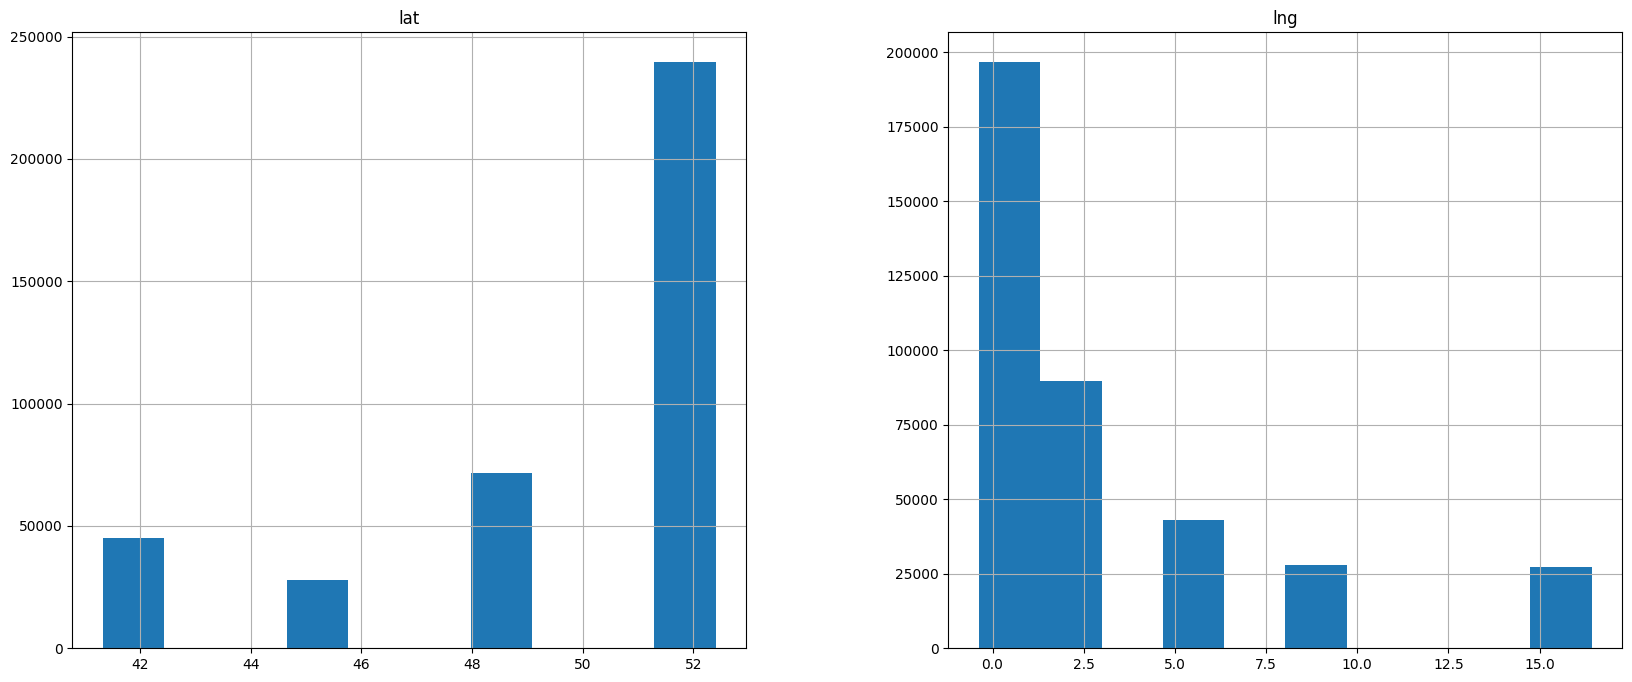

In [15]:
# работа с пропусками
# пропуски есть в двух столбцах - lat и lng (широта и долгота отеля). 
# посмотрим как распределены значения в этих столбцах
list_of_columns_to_fill = ['lat','lng']
hotels_prepared[list_of_columns_to_fill].hist(figsize=(20, 8));

#графически они отличны от нормального, поэтому теоретически можно заполнить их модой. к тому же доля пропусков менее 1%
#но, т.к. количество стран всего 6, можно заполнить их средними значениям тех отелей, которые находятся в той же стране.

#ищем средние координаты по стране
mean_coordinates = hotels_prepared.groupby(['hotel_address_prep1'])[['lat','lng']].mean()

#создаем два столбца со средними координатами
hotels_prepared['lat_mean'] = hotels_prepared['hotel_address_prep1'].apply(lambda x: mean_coordinates.loc[x,'lat'])
hotels_prepared['lng_mean'] = hotels_prepared['hotel_address_prep1'].apply(lambda x: mean_coordinates.loc[x,'lng'])

#заполняем пропуски средним значением
values = {
    'lat': hotels_prepared['lat_mean'],
    'lng': hotels_prepared['lng_mean']
}

hotels_prepared = hotels_prepared.fillna(values)

#убираем два столбца со средним значением
hotels_prepared = hotels_prepared.drop(['lng_mean', 'lat_mean'], axis=1)

#проверка на наличие пустых значений
hotels_prepared[list_of_columns_to_fill].isnull().mean()

# Продолжение создания новых признаков

In [16]:
#Количество проведённых ночей по тегах
#Нужна цифра стоит между 'Stayed' и 'night' 
# используем регулярные выражения
hotels_prepared['nights'] = hotels['tags'].str.findall('(?<=Stayed\s)\d{1,2}')

#переводим в строковый формат
hotels_prepared['nights'] = hotels_prepared['nights'].astype('str')

#есть случаи, когда нужных тегов не было, тогда заменяем значение
hotels_prepared['nights'] = hotels_prepared['nights'].apply(lambda x: "'0'" if x=='[]' else x)

#вытаскиваем цифры из списка и переводим в числовой формат
hotels_prepared['nights'] = hotels_prepared['nights'].apply(lambda x: x.split("'")[1])
hotels_prepared['nights'] = hotels_prepared['nights'].astype('int')

In [17]:
#Кодирование признака на наличие соответствующего тега (выберем наиболее 20 популярных, остальные - заменим значением) 
# отказался этой идеи, т.к. важность признака при расчете результирующего показателя низкая
#hotels_prepared_new['tags'].value_counts(ascending=False).head(20)
#20 наиболее популярных тегов будут встречаться в почти 96% значений
#popular_tags = list(hotels_prepared_new['tags'].value_counts().nlargest(20).index)

#убираем списка теги с указанием количества ночей - у нас уже есть признак, который отвечает за это (nights)
#for i in popular_tags:
    #if ('Stayed' in i):
        #popular_tags.remove(i)

#popular_tags.remove("' Stayed 2 nights '") #не удалялось перебором, поэтому убрал вручную

#может быть такая ситуация, что у одного отзыва может быть несколько разных тегов, поэтому для каждого тега сделаем отдельный сигнальный столбец

#for i in popular_tags:
    #hotels_prepared[i] = hotels_prepared['tags'].apply(lambda x: 1 if i in x else 0)

In [18]:
hotels_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 22 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               386803 non-null  object        
 1   additional_number_of_scoring                386803 non-null  int64         
 2   review_date                                 386803 non-null  datetime64[ns]
 3   average_score                               386803 non-null  float64       
 4   hotel_name                                  386803 non-null  object        
 5   negative_review                             386803 non-null  object        
 6   review_total_negative_word_counts           386803 non-null  int64         
 7   total_number_of_reviews                     386803 non-null  int64         
 8   positive_review                             386803 non-null  object       

# Удаление ненужных текстовых данных

In [19]:
# удаление ненужных текстовых данных 
# подготавливаем исходную таблцу - удаляем ненужные столбцы с текстовыми данными
hotels_cleared = hotels_prepared.copy()

#создаем список столбцов, которые нужно убрать

object_columns = [s for s in hotels_prepared.columns if hotels_prepared[s].dtypes == 'object']

#очищаем таблицу
hotels_cleared = hotels_cleared.drop(object_columns, axis = 1)

#убираем результирующий показатель reviewer_score
hotels_cleared = hotels_cleared.drop(['reviewer_score'], axis = 1) 

#убираем столбец с датой
hotels_cleared = hotels_cleared.drop(['review_date'], axis = 1) 
hotels_cleared.head()

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,days_since_review,lat,lng,month_of_review,reviewer_nationality_prep1,hotel_address_prep1,nights
0,581,8.4,3,1994,4,7,531,51.507894,-0.143671,2,1,1,2
1,299,8.3,3,1361,2,14,203,51.521009,-0.123097,1,1,1,1
2,32,8.9,6,406,0,14,289,48.845377,2.325643,10,2,2,3
3,34,7.5,0,607,11,8,681,48.888697,2.394540,9,1,2,1
4,914,8.5,4,7586,20,10,516,52.385601,4.847060,3,2,3,6


In [20]:
hotels_cleared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 13 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386803 non-null  int64  
 1   average_score                               386803 non-null  float64
 2   review_total_negative_word_counts           386803 non-null  int64  
 3   total_number_of_reviews                     386803 non-null  int64  
 4   review_total_positive_word_counts           386803 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 6   days_since_review                           386803 non-null  int32  
 7   lat                                         386803 non-null  float64
 8   lng                                         386803 non-null  float64
 9   month_of_review                             386803 non-null  int64  
 

# Проверка на выбросы

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [32]:
#Объявляем функцию, реализующую фильтрацию выбросов по методу z-отклонений
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

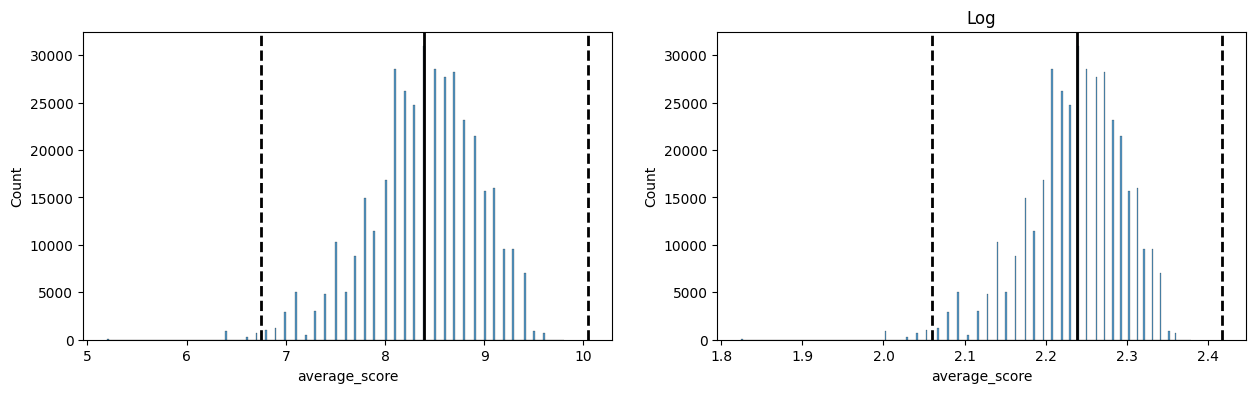

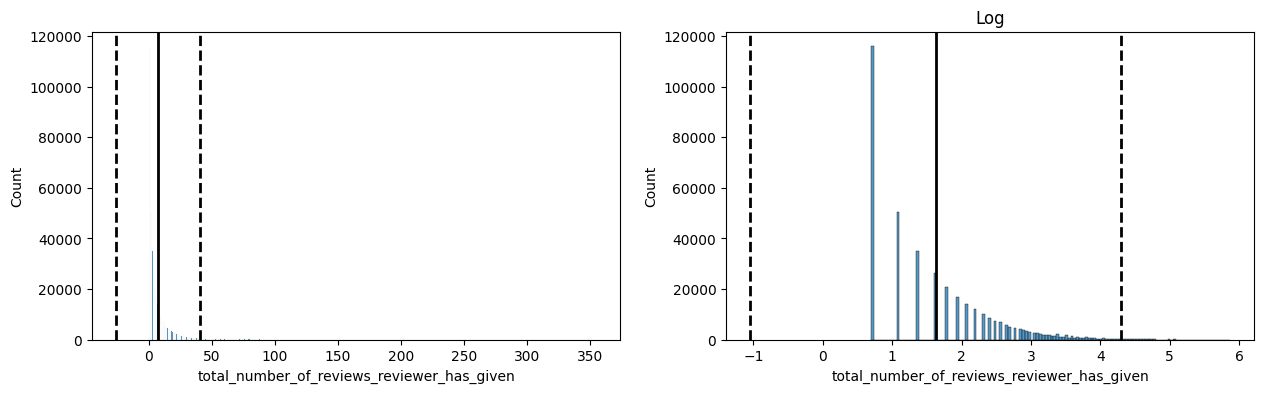

In [40]:
#посмотрим на распределение признаков
#указываем нужные признаки
outliers_features = [
    'average_score',
    'total_number_of_reviews_reviewer_has_given'
    #'review_total_negative_word_counts_cleaned', 'review_total_positive_word_counts_cleaned', 
    #'comment_words_sum', 'nights_count', 'room_type_count', 'additional_number_of_scoring', 'total_number_of_reviews', 'center_distance'
]

#делаем графики
for i in outliers_features:
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))
    #гистограмма исходного признака
    histplot = sns.histplot(data=hotels_cleared[i], ax=axes[0]);
    histplot.axvline(hotels_cleared[i].mean(), color='k', lw=2)
    histplot.axvline(hotels_cleared[i].mean()+ 3 * hotels_cleared[i].std(), color='k', ls='--', lw=2)
    histplot.axvline(hotels_cleared[i].mean()- 3 * hotels_cleared[i].std(), color='k', ls='--', lw=2)

    #гистограмма в логарифмическом масштабе
    log_features= np.log(hotels_cleared[i]+1)
    histplot2 = sns.histplot(log_features, ax=axes[1])
    histplot2.axvline(log_features.mean(), color='k', lw=2)
    histplot2.axvline(log_features.mean()+ 3 * log_features.std(), color='k', ls='--', lw=2)
    histplot2.axvline(log_features.mean()- 3 * log_features.std(), color='k', ls='--', lw=2)
    histplot2.set_title('Log');

In [41]:
#создадим df c количеством выбросов
outliers_dict= {'outliers':[], 'lower_bound':[], 'upper_bound':[]}

for i in outliers_features:
    outliers, cleaned = outliers_z_score(hotels_cleared, i, log_scale=False)
    outliers_dict['outliers'].append(outliers.shape[0])
    outliers_dict['lower_bound'].append(hotels_cleared[i].mean() - 3 * hotels_cleared[i].std())
    outliers_dict['upper_bound'].append(hotels_cleared[i].mean() + 3 * hotels_cleared[i].std())
    
outliers_df = pd.DataFrame(outliers_dict)
#доля выбросов от общего числа
outliers_df['share'] = outliers_df['outliers'] / hotels_cleared.shape[0]
outliers_df.index = outliers_features

display(outliers_df)

,outliers,lower_bound,upper_bound,share
average_score,1930,6.753588,10.040873,0.004990
total_number_of_reviews_reviewer_has_given,7615,-25.986009,40.340510,0.019687


In [ ]:
#выбросов немного поэтому все их удалим
hotels_cleared.drop

# Отбор признаков

In [185]:
# Посмотрим на распределение признаков и корреляцию
import seaborn as sns

In [186]:
hotels_cleared.columns

Index(['additional_number_of_scoring', 'average_score',
       'review_total_negative_word_counts', 'total_number_of_reviews',
       'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given', 'days_since_review',
       'lat', 'lng', 'month_of_review', 'reviewer_nationality_prep1',
       'hotel_address_prep1', 'nights'],
      dtype='object')

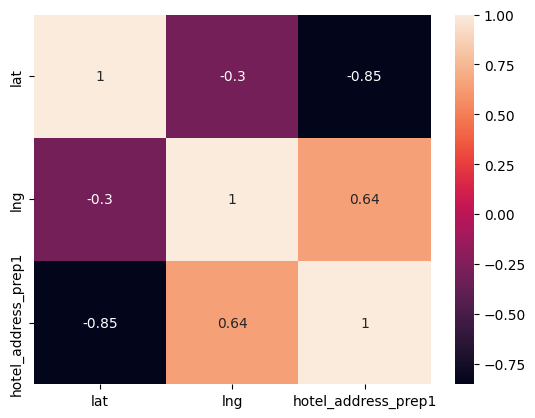

In [187]:
# в первую очередь проверим корреляцию страны отеля и широты с долготой
sns.heatmap(hotels_cleared[['lat','lng','hotel_address_prep1']].corr(), annot = True)
# сильная мультиколинеарность есть, поэтому лучше отказаться от признаков lng и lat
# удаляем столбцы lat, lng
hotels_cleared = hotels_cleared.drop(['lat','lng'],axis=1)

<AxesSubplot: >

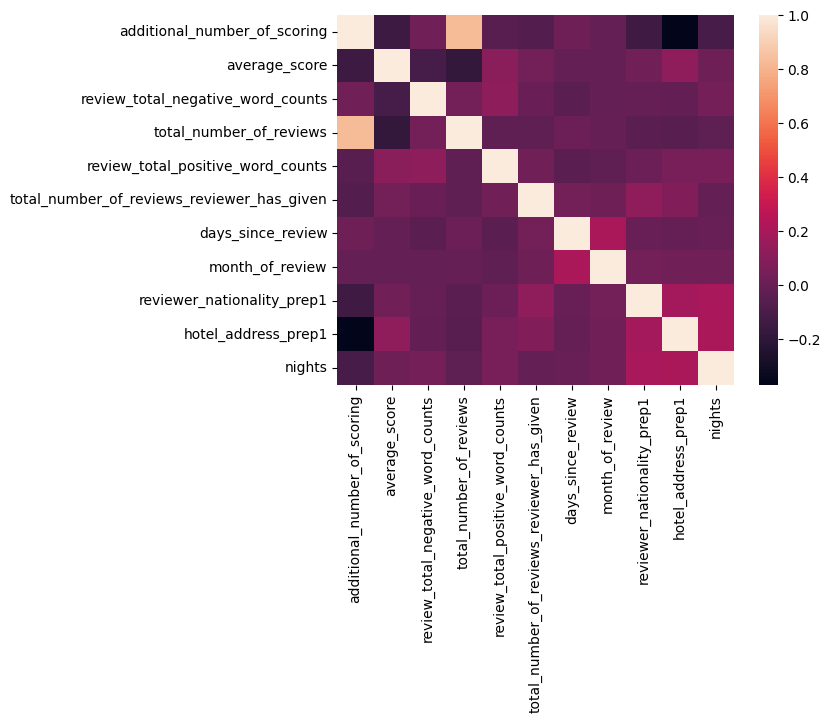

In [188]:
sns.heatmap(hotels_cleared.corr())
# у нас больше 20 признаков, соответственно получается матрица на 400 ячеек ячеек и , что затрудняет оценку
# попробуем убрать лишние значения

In [189]:
corr_table = hotels_cleared.corr()

# заменяем значение при корреляции столбца самого на себя с 1 на 0
for i in corr_table.columns:
    corr_table[i] = corr_table[i].apply(lambda x: 0 if x==1 else x)

#отбираем столбцы с экстремальными значениями
list_of_columns = []
for i in corr_table.columns:
    if corr_table[i].min()<=-0.7 or corr_table[i].max()>=0.7:
        list_of_columns.append(i)
    
corr_table_prep = corr_table[list_of_columns]

<AxesSubplot: >

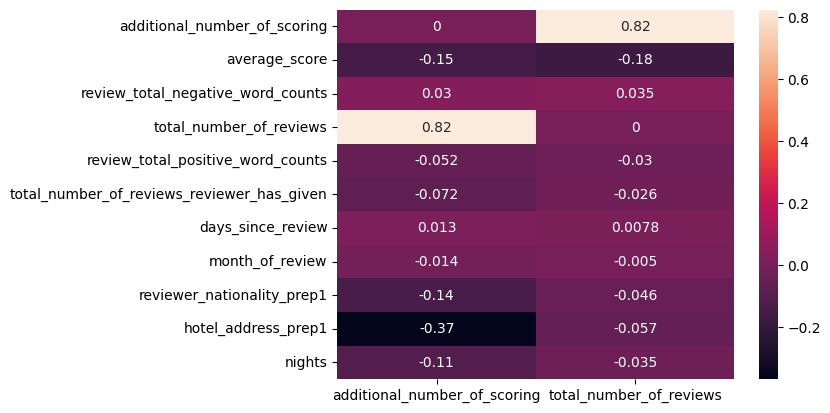

In [190]:
sns.heatmap(corr_table_prep, annot = True)
# сильная корреляция:
# между тегами ' Leisure trip ' и ' Business trip ' (в одной записим может быть несколько тегов, поэтому это нормально) - лучше убрать ' Business trip '
# количеством тегов и тегом ' Submitted from a mobile device ' (вероятно это первый тег при записи и он чаще всего встречается) - стоит убрать признак Submitted from a mobile device 
# 'total_number_of_reviews' и 'additional_number_of_scoring' - между этими показателями есть пропорция (т.е. сколько гостей поставили оценку, но не оставили отзыв)
# 'year_of_review' и 'days_since_review' - сильная связь объясняется тем, что вероятно дата проверки близка к фиксированному значению, а значит год и количество дней до даты проверки сильно зависимы друг от друга

In [191]:
#убираем ненужные признаки ' Business trip ', ' Submitted from a mobile device ', 'year_of_review', 'additional_number_of_scoring'
#отказался от этой идеи, т.к. итоговая метрика не увеличилась
#hotels_cleared = hotels_cleared.drop(["' Business trip '","' Submitted from a mobile device '",'year_of_review','additional_number_of_scoring'],axis=1)

<AxesSubplot: >

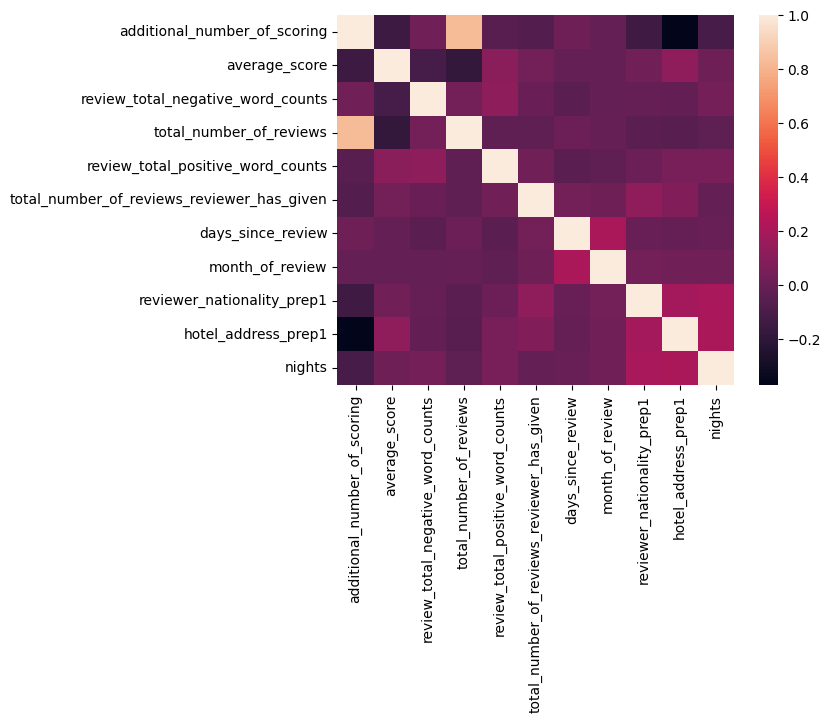

In [192]:
sns.heatmap(hotels_cleared.corr())

In [193]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = hotels_cleared  
y = hotels['reviewer_score'] 

Перед обучением (после разделения выборки на X и y) мы можем оценить значимость каждого признака для целевой переменной — рейтинг отеля. При помощи теста мы сможем узнать, как географическая долгота отеля и количество негативных отзывов влияют на его рейтинг.

Для оценки значимости категориальных признаков будем использовать тест хи-квадрат, для непрерывных признаков — тест ANOVA.

Для начала разделим признаки по типу, перечислим их:

In [194]:
hotels_cleared.columns
#hotels_cleared.head()

Index(['additional_number_of_scoring', 'average_score',
       'review_total_negative_word_counts', 'total_number_of_reviews',
       'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given', 'days_since_review',
       'month_of_review', 'reviewer_nationality_prep1', 'hotel_address_prep1',
       'nights'],
      dtype='object')

In [195]:
len(hotels_cleared.columns)

11

In [181]:
hotels_cleared["' Couple '"].value_counts()

0    197591
1    189212
Name: ' Couple ', dtype: int64

In [196]:
# непрерывные признаки
num_cols = ['additional_number_of_scoring','average_score','review_total_negative_word_counts','total_number_of_reviews','review_total_positive_word_counts','total_number_of_reviews_reviewer_has_given','days_since_review']

# категориальные признаки
cat_cols = ['month_of_review','reviewer_nationality_prep1','hotel_address_prep1','nights']

In [197]:
len(num_cols)+len(cat_cols)

11

<AxesSubplot: >

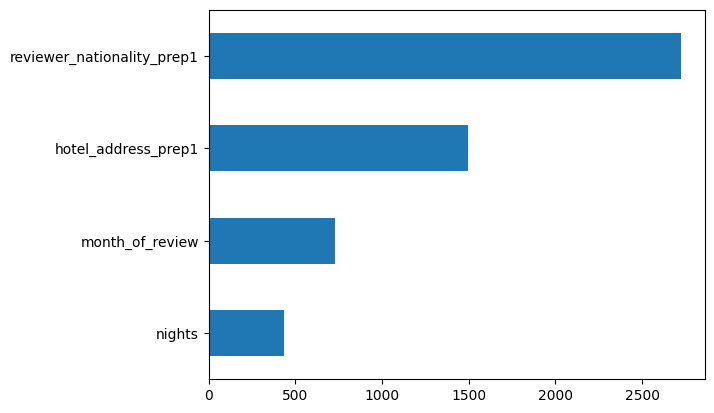

In [198]:
# Для оценки значимости категориальных переменных будем использовать изученный нами непараметрический тест хи-квадрат, реализованный в библиотеке sklearn.feature_selection.chi2. 
# Метод возвращает массив значений хи-квадрат и p-value для каждого признака. 
# Используем только значения хи-квадрат и выведем их на графике:

y=y.astype('int')


from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

<AxesSubplot: >

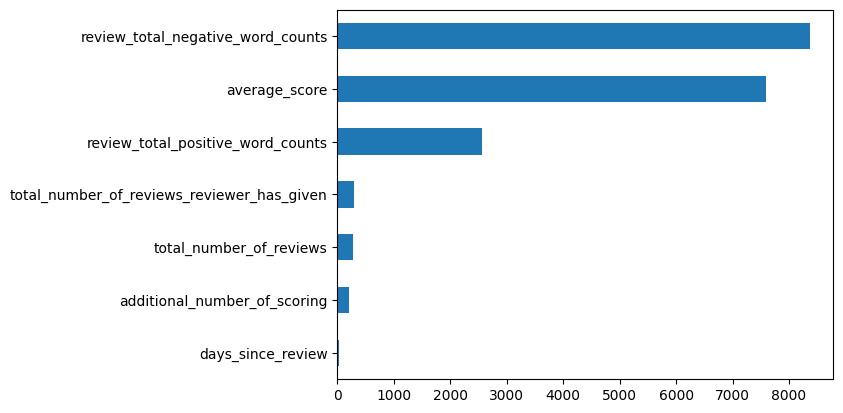

In [199]:
# Для оценки значимости непрерывных переменных будем использовать функцию f_classif из библиотеки sklearn. 
# В основе метода оценки значимости переменных лежит анализ (ANOVA). 
# Основу процедуры составляет обобщение результатов двух выборочных t-тестов для независимых выборок (2-sample t).

# Метод возвращает двумерный массив f-статистик и p-value для каждого признака. 
# В качестве меры значимости будем использовать значение f-статистики. 
# Чем значение статистики выше, тем меньше вероятность того, что средние значения не отличаются, и тем важнее данный признак для нашей модели.

from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [200]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

In [201]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [202]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100,verbose=1, n_jobs=-1, random_state=42)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    4.0s finished


<AxesSubplot: >

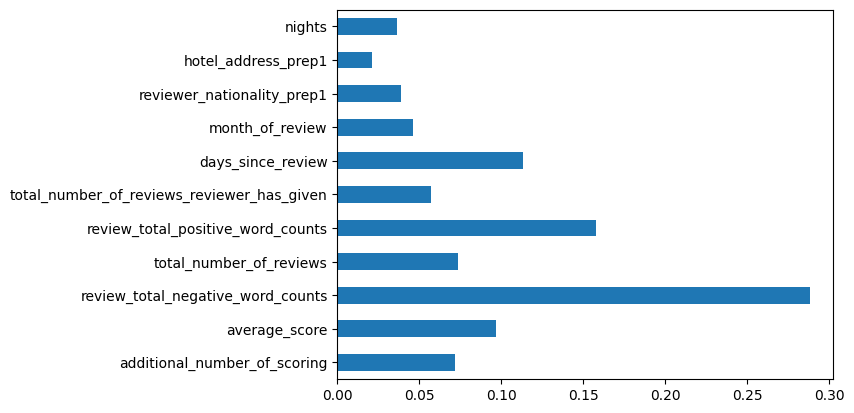

In [205]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')

## Порезультатам оценки важности оказалось, что:
1. Признаки наличия определенного тега оказались не важными при оценке результирующего показателя (при последующих расчётах отказался от них)
2. Признак количества тегов также оказался не важным
3. Признак года оказался не важным

In [206]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.16145761134672215


In [ ]:
#для формирования файла submission для соревнования на kaggle
#test_data = pd.read_csv(DATA_DIR+'hotels_test.csv')
#sample_submission = pd.read_csv(DATA_DIR+'/submission.csv')

#читаем тестовые данные, удаляем столбец, предсказываем
test_data = pd.read_csv('data/hotels_test.csv.zip')
test_data = test_data.drop(['reviewer_score'], axis=1)
predict_submission = regr.predict(test_data)

#читаем изначальный файл субмишна, вставляем в столбец значения, сохраняем
sample_submission = pd.read_csv('data/hotels_test.csv.zip')
sample_submission['reviewer_score'] = predict_submission
sample_submission.to_csv('data/submission.csv.zip', index=False)
sample_submission.head(10)